# 2016 - Une solution à la compétition de machine learning 2A

Ce notebook a été proposé par un étudiant pour la compétition organisée pour ce cours : [classification binaire](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/all_notebooks.html#annee-2016).

In [1]:
from pyensae.datasource import download_data
download_data("ensae_competition_2016.zip",
              url="https://github.com/sdpython/ensae_teaching_cs/raw/master/_doc/competitions/2016_ENSAE_2A/")

['ensae_competition_test_X.txt', 'ensae_competition_train.txt']

In [2]:
# packages
import pandas as pd
import numpy as np
from sklearn import svm, linear_model, datasets, metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess

In [3]:
# dataframe
# df = pd.read_excel("default_of_credit_card_clients.xls", header=[0, 1],encoding="utf8",index_col=0)
df = pd.read_csv("ensae_competition_train.txt", header=[0, 1], encoding="utf8", index_col=0, sep="\t")
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,180000,1,2,1,47,0,0,0,0,0,...,99694,65977,67415,3700,3700,4100,2360,2500,2618,0
1,110000,2,2,1,35,0,0,0,0,0,...,4869,4966,5070,1053,1073,1081,178,184,185,1
2,70000,2,2,2,22,0,0,0,0,0,...,69927,50579,49483,2501,3001,2608,1777,1792,1793,1
3,200000,2,1,2,27,-2,-2,-2,-2,-2,...,1665,3370,-36,5610,15616,1673,3385,0,95456,0
4,370000,2,1,1,39,0,0,0,0,0,...,48216,47675,48074,2157,2000,1668,2000,3000,1000,0
5,260000,2,1,1,29,0,0,0,-2,-2,...,0,0,0,3090,0,0,0,0,141516,0
6,90000,2,1,1,43,-1,-1,2,-1,-1,...,7660,21175,4009,4367,9,7660,21175,4009,7452,0
7,220000,2,1,1,43,-1,3,2,0,0,...,1090,1090,0,167,0,0,0,0,0,1
8,50000,1,2,1,35,1,2,0,0,0,...,21260,70,29575,0,2052,1800,0,29935,1200,1


In [4]:
df.columns

MultiIndex(levels=[['X1', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X2', 'X20', 'X21', 'X22', 'X23', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y'], ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'EDUCATION', 'LIMIT_BAL', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'default payment next month']],
           labels=[[0, 11, 16, 17, 18, 19, 20, 21, 22, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 23], [8, 22, 7, 9, 0, 10, 11, 12, 13, 14, 15, 1, 2, 3, 4, 5, 6, 16, 17, 18, 19, 20, 21, 23]],
           names=[None, 'ID'])

In [5]:
# Retrait 2ème ligne header

df1 = df.copy()
df1.columns = df1.columns.droplevel(-1)

In [6]:
df1.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

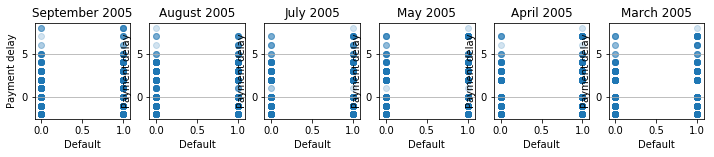

In [7]:
# statistiques descriptives

# paramètres des graphes
fig = plt.figure(figsize=(12, 6)) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

'''graphs - the history of past payment'''

# September 2005
plt.subplot2grid((3,6),(0,0))
plt.scatter(df1.Y, df1.X6, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre                        
plt.grid(b=True, which='major', axis='y')  
plt.title("September 2005")

# August 2005
plt.subplot2grid((3,6),(0,1))
plt.scatter(df1.Y, df1.X7, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre                         
plt.grid(b=True, which='major', axis='y')  
plt.title("August 2005")

# July 2005
plt.subplot2grid((3,6),(0,2))
plt.scatter(df1.Y, df1.X8, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre                         
plt.grid(b=True, which='major', axis='y')  
plt.title("July 2005")

# May 2005
plt.subplot2grid((3,6),(0,3))
plt.scatter(df1.Y, df1.X9, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre                         
plt.grid(b=True, which='major', axis='y')  
plt.title("May 2005")

# April 2005
plt.subplot2grid((3,6),(0,4))
plt.scatter(df1.Y, df1.X10, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre             
plt.grid(b=True, which='major', axis='y')  
plt.title("April 2005")

# March 2005
plt.subplot2grid((3,6),(0,5))
plt.scatter(df1.Y, df1.X11, alpha=alpha_scatterplot)
# axe x
plt.xlabel("Default")
# axe y
plt.ylabel("Payment delay")
# grid - titre                          
plt.grid(b=True, which='major', axis='y')  
plt.title("March 2005")

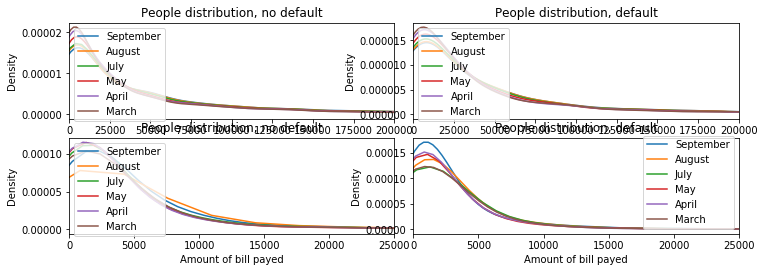

In [8]:
fig = plt.figure(figsize=(12, 6)) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

'''Graphs - bill statement'''

# personnes pas en défaut de paiement
ax1 = plt.subplot2grid((3,6),(1,0), colspan=3)
# kernel density
df1.X12[df1.Y == 0].plot(kind='kde')    
df1.X13[df1.Y == 0].plot(kind='kde')
df1.X14[df1.Y == 0].plot(kind='kde')
df1.X15[df1.Y == 0].plot(kind='kde')
df1.X16[df1.Y == 0].plot(kind='kde')
df1.X17[df1.Y == 0].plot(kind='kde')
# axes
plt.xlabel("Bill statement")    
plt.title("People distribution, no default")
# limites
ax1.set_xlim(0, 200000)
# légende
plt.legend(('September','August','July','May','April','March'),loc='best')

# personnes en défaut de paiement
ax2 = plt.subplot2grid((3,6),(1,3), colspan=3)
# kernel density
df1.X12[df1.Y == 1].plot(kind='kde')    
df1.X13[df1.Y == 1].plot(kind='kde')
df1.X14[df1.Y == 1].plot(kind='kde')
df1.X15[df1.Y == 1].plot(kind='kde')
df1.X16[df1.Y == 1].plot(kind='kde')
df1.X17[df1.Y == 1].plot(kind='kde')
# axes
plt.xlabel("Bill statement")    
plt.title("People distribution, default")
# limites
ax2.set_xlim(0, 200000)
# légende
plt.legend(('September','August','July','May','April','March'),loc='best')


'''Graphs - amount of bill payed'''

# personnes pas en défaut de paiement
ax1 = plt.subplot2grid((3,6),(2,0), colspan=3)
# kernel density
df1.X18[df1.Y == 0].plot(kind='kde')    
df1.X19[df1.Y == 0].plot(kind='kde')
df1.X20[df1.Y == 0].plot(kind='kde')
df1.X21[df1.Y == 0].plot(kind='kde')
df1.X22[df1.Y == 0].plot(kind='kde')
df1.X23[df1.Y == 0].plot(kind='kde')
# axes
plt.xlabel("Amount of bill payed")    
plt.title("People distribution, no default")
# limites
ax1.set_xlim(0, 25000)
# légende
plt.legend(('September','August','July','May','April','March'),loc='best')

# personnes en défaut de paiement
ax2 = plt.subplot2grid((3,6),(2,3), colspan=3)
# kernel density
df1.X18[df1.Y == 1].plot(kind='kde')    
df1.X19[df1.Y == 1].plot(kind='kde')
df1.X20[df1.Y == 1].plot(kind='kde')
df1.X21[df1.Y == 1].plot(kind='kde')
df1.X22[df1.Y == 1].plot(kind='kde')
df1.X23[df1.Y == 1].plot(kind='kde')
# axes
plt.xlabel("Amount of bill payed")    
plt.title("People distribution, default")
# limites
ax2.set_xlim(0, 25000)
# légende
plt.legend(('September','August','July','May','April','March'),loc='best')

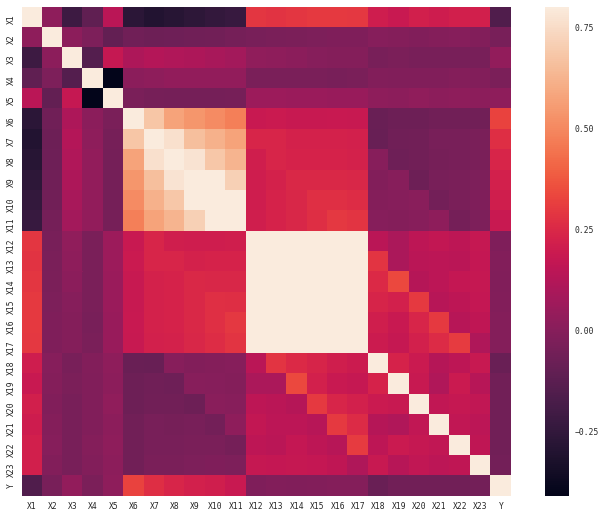

In [9]:
# Matrice des corrélations

sns.set(context="paper", font="monospace")
corrmat = df1.corr()

# atplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

In [10]:
# on modifie les colonnes (création de variables d'intérêt)

df1['TotalDelay'] = df1.X11 + 2*df1.X10 + 4*df1.X9 + 8*df1.X8 + 16*df1.X7 + 32*df1.X6
df1['TotalPayment'] = df1.X23 + 2*df1.X22 + 3*df1.X21 + 4*df1.X20 + 5*df1.X19 + 6*df1.X18
df1['PartMay'] = -(df1.X22 - df1.X17)/(df1.X17 + 1)
df1['PartJune'] = -(df1.X21 - df1.X16)/(df1.X16 + 1)
df1['PartJuly'] = -(df1.X20 - df1.X15)/(df1.X15 + 1)
df1['PartAugust'] = -(df1.X19 - df1.X14)/(df1.X14 + 1)
df1['PartSeptember'] = -(df1.X18 - df1.X13)/(df1.X13 + 1)
df1.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,Y,TotalDelay,TotalPayment,PartMay,PartJune,PartJuly,PartAugust,PartSeptember
0,180000,1,2,1,47,0,0,0,0,0,...,2500,2618,0,0,71798,0.962902,0.964215,0.958865,0.961978,0.961112
1,110000,2,2,1,35,0,0,0,0,0,...,184,185,1,0,17094,0.963518,0.963962,0.777823,0.721906,0.850305
2,70000,2,2,2,22,0,0,0,0,0,...,1792,1793,1,0,51151,0.963766,0.964848,0.962690,0.956517,0.962942
3,200000,2,1,2,27,-2,-2,-2,-2,-2,...,0,95456,0,-126,224043,1.028571,-0.004450,-0.004802,-0.004502,-0.009899
4,370000,2,1,1,39,0,0,0,0,0,...,3000,1000,0,0,42614,0.937577,0.958029,0.965386,0.959245,0.968143
5,260000,2,1,1,29,0,0,0,-2,-2,...,0,141516,0,-14,160056,0.000000,0.000000,0.000000,0.000000,0.942813
6,90000,2,1,1,43,-1,-1,2,-1,-1,...,4009,7452,0,-39,135882,0.000000,0.000000,0.000000,0.997711,0.393333
7,220000,2,1,1,43,-1,3,2,0,0,...,0,0,1,32,1002,0.000000,0.999083,0.999083,0.999083,0.866455
8,50000,1,2,1,35,1,2,0,0,0,...,29935,1200,1,63,78530,-0.012172,0.985915,0.915291,0.956269,0.999979
9,50000,2,3,2,40,0,0,0,0,0,...,325,436,0,0,19283,0.962316,0.963619,0.879296,0.847636,0.806216


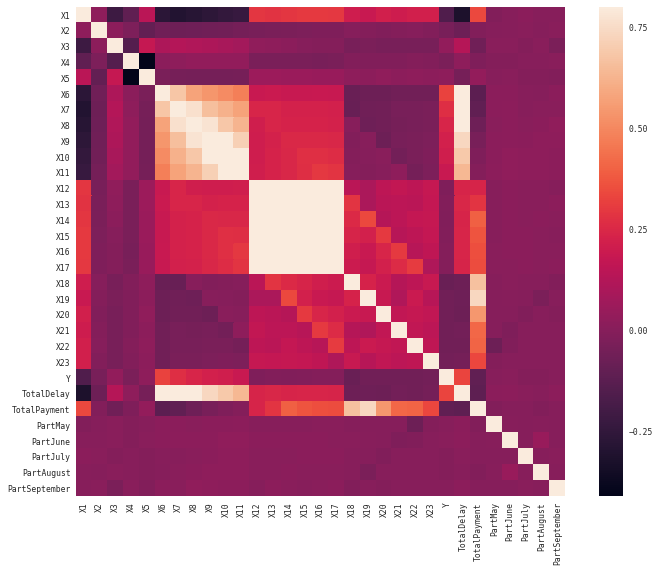

In [11]:
# Matrice des corrélations

sns.set(context="paper", font="monospace")
corrmat = df1.corr()

# matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

In [12]:
# drop some columns

df1 = df1.drop(['X'+str(n) for n in range(7,12)] + ['X'+str(n) for n in range(13,24)], axis=1)
df1.head(20)

,X1,X2,X3,X4,X5,X6,X12,Y,TotalDelay,TotalPayment,PartMay,PartJune,PartJuly,PartAugust,PartSeptember
0,180000,1,2,1,47,0,179253,0,0,71798,0.962902,0.964215,0.958865,0.961978,0.961112
1,110000,2,2,1,35,0,6137,1,0,17094,0.963518,0.963962,0.777823,0.721906,0.850305
2,70000,2,2,2,22,0,66505,1,0,51151,0.963766,0.964848,0.962690,0.956517,0.962942
3,200000,2,1,2,27,-2,4941,0,-126,224043,1.028571,-0.004450,-0.004802,-0.004502,-0.009899
4,370000,2,1,1,39,0,141552,0,0,42614,0.937577,0.958029,0.965386,0.959245,0.968143
5,260000,2,1,1,29,0,71864,0,-14,160056,0.000000,0.000000,0.000000,0.000000,0.942813
6,90000,2,1,1,43,-1,16139,0,-39,135882,0.000000,0.000000,0.000000,0.997711,0.393333
7,220000,2,1,1,43,-1,1090,1,32,1002,0.000000,0.999083,0.999083,0.999083,0.866455
8,50000,1,2,1,35,1,48047,1,63,78530,-0.012172,0.985915,0.915291,0.956269,0.999979
9,50000,2,3,2,40,0,5538,0,0,19283,0.962316,0.963619,0.879296,0.847636,0.806216


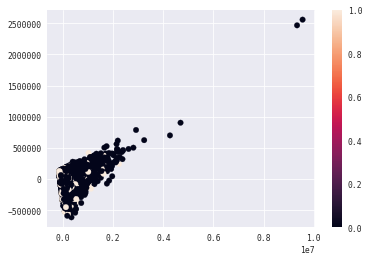

In [13]:
from sklearn.decomposition import PCA
from numpy import inf
pca = PCA(n_components=2, svd_solver='randomized')
dfpca = df1.as_matrix()
dfpca[dfpca == -inf] = 0
y = dfpca[:, 7]
proj = pca.fit_transform(dfpca[:, :7 + 8:])
plt.scatter(proj[:, 0], proj[:, 1], c=y)
plt.colorbar()

In [14]:
# training/crossval set

X = df1.values
X[X==-inf] = 0
print(df1.head())
# training set
X_train = X[:, :]
Y_train = X[:, 7].ravel()
X_train = np.delete(X_train, 7, axis=1)
# expected result
expected = X[20000:, 7].ravel()
# cross-validation data set
X_cross = X[20000:, :]
X_cross = np.delete(X_cross, 7, axis=1)

       X1  X2  X3  X4  X5  X6     X12  Y  TotalDelay  TotalPayment   PartMay  \
0  180000   1   2   1  47   0  179253  0           0         71798  0.962902   
1  110000   2   2   1  35   0    6137  1           0         17094  0.963518   
2   70000   2   2   2  22   0   66505  1           0         51151  0.963766   
3  200000   2   1   2  27  -2    4941  0        -126        224043  1.028571   
4  370000   2   1   1  39   0  141552  0           0         42614  0.937577   

   PartJune  PartJuly  PartAugust  PartSeptember  
0  0.964215  0.958865    0.961978       0.961112  
1  0.963962  0.777823    0.721906       0.850305  
2  0.964848  0.962690    0.956517       0.962942  
3 -0.004450 -0.004802   -0.004502      -0.009899  
4  0.958029  0.965386    0.959245       0.968143  


In [15]:
from sklearn.naive_bayes import GaussianNB

# train the model
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

# use the model to predict the labels of the test data
predicted = GNB.predict(X_cross)

print(metrics.confusion_matrix(expected, predicted))

[[ 209 1732]
 [  26  533]]


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

GBR = GradientBoostingClassifier()
GBR.fit(X_train,Y_train)
predicted = GBR.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))

[[1848   93]
 [ 352  207]]


In [17]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier(5)
KNC.fit(X_train, Y_train)
predicted = KNC.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))
pred = KNC.predict_proba(X_train)

[[1864   77]
 [ 368  191]]


In [18]:
print(pred[:10])
print(Y_train[:10])

[[ 1.   0. ]
 [ 0.6  0.4]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 0.4  0.6]
 [ 0.8  0.2]]
[ 0.  1.  1.  0.  0.  0.  0.  1.  1.  0.]


In [19]:
# neural network

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# optimisation - choix du nombre de couches
param_grid = [
  {'hidden_layer_sizes': [(nb,) for nb in range(20,50,10)]}, 
  {'alpha': [a/100 for a in range(0,40,20)]}
 ]

neural2 = GridSearchCV(MLPClassifier(), param_grid, verbose=1)
neural2.fit(X_train, Y_train)
neural2.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   27.2s finished


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [20]:
neural = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(170,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
neural.fit(X_train, Y_train)
predicted = neural.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))
neural.predict_proba(X_cross[:10])

[[1780  161]
 [ 378  181]]


array([[  1.00000000e+000,   4.54194423e-294],
       [  1.00000000e+000,   1.14673239e-101],
       [  1.00000000e+000,   1.13397258e-051],
       [  1.00000000e+000,   1.89540529e-117],
       [  1.00000000e+000,   8.01811448e-032],
       [  1.00000000e+000,   1.14003085e-160],
       [  1.00000000e+000,   1.02562443e-115],
       [  1.00000000e+000,   9.41507727e-017],
       [  1.00000000e+000,   3.16744761e-026],
       [  6.95744980e-001,   3.04255020e-001]])

In [21]:
if_you_have_time = False
if if_you_have_time:
    from sklearn.gaussian_process import GaussianProcessClassifier

    GPC = GaussianProcessClassifier()
    GPC.fit(X_train, Y_train)
    predicted = GPC.predict(X_cross)
    print(metrics.confusion_matrix(expected, predicted))
    GPC.predict_proba(X_cross)

In [22]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(5)
RFC.fit(X_train, Y_train)
predicted = RFC.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))
print(RFC.predict_proba(X_cross))
print(expected)

[[1928   13]
 [  65  494]]
[[ 1.   0. ]
 [ 1.   0. ]
 [ 0.   1. ]
 ..., 
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.8  0.2]]
[ 0.  0.  1. ...,  0.  0.  0.]


In [23]:
if if_you_have_time:
    from sklearn.svm import SVC

    SVC = SVC(probability = True)
    SVC.fit(X_train, Y_train)
    predicted = SVC.predict(X_cross)
    print(metrics.confusion_matrix(expected, predicted))
    print(SVC.predict_proba(X_cross))
    print(expected)

In [24]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, Y_train)
predicted = LR.predict(X_cross)
print(metrics.confusion_matrix(expected, predicted))
print(LR.predict_proba(X_train))
print(Y_train)

[[1861   80]
 [ 413  146]]
[[ 0.85603222  0.14396778]
 [ 0.72020052  0.27979948]
 [ 0.69524708  0.30475292]
 ..., 
 [ 0.69884026  0.30115974]
 [ 0.85309221  0.14690779]
 [ 0.75099513  0.24900487]]
[ 0.  1.  1. ...,  0.  0.  0.]


In [25]:
#--------------#
# modèle final #
#--------------#

# dataframe
dfend = pd.read_csv("ensae_competition_test_X.txt", header=[0, 1], sep='\t', encoding="utf8", index_col=0)
dfend.columns = dfend.columns.droplevel(-1)

# modifications colonnes
dfend['TotalDelay'] = dfend.X11 + 2*dfend.X10 + 4*dfend.X9 + 8*dfend.X8 + 16*dfend.X7 + 32*dfend.X6
dfend['TotalPayment'] = dfend.X23 + 2*dfend.X22 + 3*dfend.X21 + 4*dfend.X20 + 5*dfend.X19 + 6*dfend.X18
dfend['PartMay'] = -(dfend.X22 - dfend.X17)/(dfend.X17 + 1)
dfend['PartJune'] = -(dfend.X21 - dfend.X16)/(dfend.X16 + 1)
dfend['PartJuly'] = -(dfend.X20 - dfend.X15)/(dfend.X15 + 1)
dfend['PartAugust'] = -(dfend.X19 - dfend.X14)/(dfend.X14 + 1)
dfend['PartSeptember'] = -(dfend.X18 - dfend.X13)/(dfend.X13 + 1)
dfend = dfend.drop(['X'+str(n) for n in range(7,12)] + ['X'+str(n) for n in range(13,24)], axis=1)

# dataset as array
X = dfend.values
X[X==-inf] = 0

In [26]:
# prédictions

# réseau de neuronnes
l = neural.predict(X)
text_file = open('answerN.txt','w')
for e in l:
    text_file.write(str(int(e)) + '\n')
text_file.close()

In [27]:
# random forest
l = RFC.predict(X)
text_file = open('answerRF.txt','w')
for e in l:
    text_file.write(str(int(e)) + '\n')
text_file.close()